### Evaluating the performance of linear regression models

In [1]:
from sklearn.datasets import load_boston

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
boston = load_boston()

In [4]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [8]:
df['Price']=boston.target

In [7]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
X=df.iloc[:,:-1].values
y = df['Price'].values

In [10]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pred_train = lr.predict(X_train)

In [14]:
y_pred_test = lr.predict(X_test)

### Residual analysis

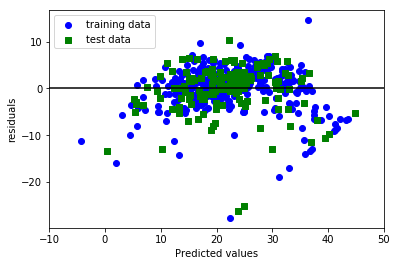

In [15]:
plt.scatter(y_pred_train,y_pred_train-y_train,c='blue',marker='o',label='training data')
plt.scatter(y_pred_test,y_pred_test-y_test,c='green',marker='s',label='test data')

plt.xlabel('Predicted values')
plt.ylabel('residuals')
plt.hlines(y=0,xmin=-10,xmax=50,color='black')
plt.legend(loc='upper left')
plt.xlim([-10,50])
plt.show()

Residual plots are a good way to visualize the errors in your data..
In case of perfect prediction, our data should be randomly scattered around line zero.
**Residuals plots can help detect nonlinearity and Outliers**

### In case of perfect prediction

<img src="images/residual.PNG" width='50%'/>

### Mean Squared Error(MSE)

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
print 'training:',mean_squared_error(y_train,y_pred_train)
print 'testing:',mean_squared_error(y_test,y_pred_test)

training: 19.9657438102
testing: 27.1838476476


MSE on training set is 19.96 and the MSE on test set is 27.18 which is larger than train set
and indicating that our model is overfitting the training data

### r2_score (coefficient of determination)

In [18]:
from sklearn.metrics import r2_score

In [19]:
print 'training:',r2_score(y_train,y_pred_train)

training: 0.764456339182


In [20]:
print 'testing:',r2_score(y_test,y_pred_test)

testing: 0.673528086535
